一元线性回归模型

1. 在拟合参数时，可以使用Numpy库中的polyfit函数，或者使用scipy.optimize模块的curve_fit函数
polyfit(x,y,deg=*) (deg=1表示一次多项式/线性拟合)

coefficients = np.polyfit(x, y, deg=1)
coefficients返回的是从高次到低次的系数
slope = coefficients[0]  # 斜率
intercept = coefficients[1]  # 截距

scipy.optimize模块的curve_fit函数ji进行一元线性回归时需自定义要拟合的函数形式
popt, pcov = curve_fit(linear_func, x_data, y_data)
    获取拟合参数
    a, b = popt  # a是斜率，b是截距
    a_err, b_err = np.sqrt(np.diag(pcov))  # 参数的标准误差

2. 为了得到线性回归模型的一些检验统计量，可以使用statsmodels库函数进行记算
# 创建模型并拟合
    model = sm.OLS(Y, X)  # 普通最小二乘法
    results = model.fit()  # 拟合模型
# 打印完整结果摘要
    print(results.summary())
# 获取所有参数估计值
    print("参数估计:\n", results.params)
# 获取特定系数的t检验和p值
    print("\n斜率(x1)的t值:", results.tvalues[1])
    print("斜率(x1)的p值:", results.pvalues[1])
    print("斜率的95%置信区间:\n", results.conf_int(alpha=0.05).iloc[1])
# 模型F检验
    print("\nF统计量:", results.fvalue)
    print("F检验p值:", results.f_pvalue)
# R-squared
    print("\nR-squared:", results.rsquared)
    print("调整R-squared:", results.rsquared_adj)
# 获取残差
    residuals = results.resid
    print("\n残差:", residuals)
# Durbin-Watson检验(自相关检验)
    print("\nDurbin-Watson统计量:", sm.stats.durbin_watson(residuals))
# 正态性检验
    print("\n残差JB检验:", sm.stats.jarque_bera(residuals))

拟合多项式为:y=-23.950588628514122*x+266.166255059977
预测值为: 74.56154603186403


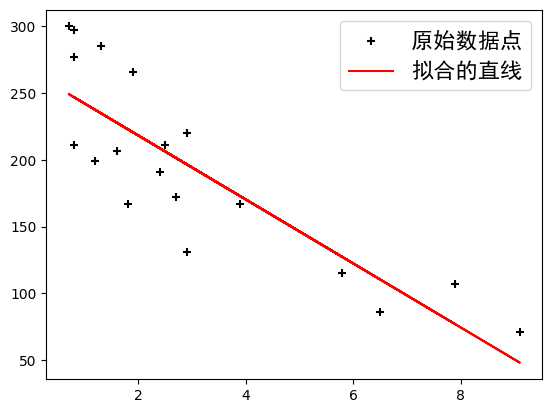

In [2]:
#通过Numpy库进行回归分析
import matplotlib.pyplot as plt
import numpy as np

x=[2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,7.9, 1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7]
y=[211, 167, 131, 191, 220, 297, 71, 211, 300, 107,167, 266, 277, 86, 207, 115, 285, 199, 172]
plt.scatter(x,y,marker='+',color='black',label='原始数据点')
p = np.polyfit(x,y,deg=1)  #拟合一次多项式
print('拟合多项式为:y={}*x+{}'.format(p[0],p[1]))
plt.rc('font',size=16,family='simhei')
plt.plot(x,np.polyval(p,x), label='拟合的直线', color='r') 
"""
np.polyval(p, x):
p 是多项式系数向量（从高次到低次）
x 是自变量的值数组
这个函数会计算多项式在x各点处的值
"""
print('预测值为:',np.polyval(p,8))  #预测x=8时的y值
plt.legend()
plt.show()

基于公式的statsmodels函数以得到检验统计量

In [3]:
import statsmodels.api as sm

x=[2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,7.9, 1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7]
y=[211, 167, 131, 191, 220, 297, 71, 211, 300, 107,167, 266, 277, 86, 207, 115, 285, 199, 172]
df = {'x':x,'y':y}  ## 创建数据框
res = sm.formula.ols('y~x',data=df).fit()  #构建并拟合模型
"""
'y ~ x': R 风格的公式语法
y: 因变量(响应变量)
x: 自变量(解释变量)
~: 表示"被...解释"的关系
"""
#查看结果摘要
print(res.summary(),'\n')
#进行预测
ypred = res.predict(dict(x=8))  #dict(x=8) 创建了一个包含键值对的字典，其中：键 'x' 对应模型中的自变量名称值, 8 是要预测的特定x值
print('所求的预测值为:',list(ypred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     43.99
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           4.23e-06
Time:                        12:58:04   Log-Likelihood:                -95.241
No. Observations:                  19   AIC:                             194.5
Df Residuals:                      17   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.1663     14.044     18.953      0.0

基于数组的statsmodels函数以得到检验统计量

In [6]:
import statsmodels.api as sm
import numpy as np

x = np.array([2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,7.9, 1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7])
y = np.array([211, 167, 131, 191, 220, 297, 71, 211, 300, 107,167, 266, 277, 86, 207, 115, 285, 199, 172])

X = sm.add_constant(x)
"""
sm.add_constant(x) 是 statsmodels 库中一个重要的函数，用于在回归模型中添加常数项（截距项）。
1.什么是常数项（截距项）？
在回归方程中，常数项（通常表示为 β₀）表示当所有自变量为零时因变量的预期值
方程形式:y = β₀ + β₁x₁ + β₂x₂ + ... + ε
2. 为什么需要显式添加常数项？
默认情况下:numpy 数组或 pandas 系列只包含自变量数据
统计软件需要明确知道模型中是否包含截距项
如果不添加常数项,模型将被强制通过原点(y=0 when x=0),这通常不符合实际情况
"""
# print(X)

md = sm.OLS(y,X).fit()  #构建并拟合模型
print(md.params,'\n--------\n')
print(md.summary())

#进行预测
ypred = md.predict([1,8])  #[1,8] 的 1 代表的是常数项（截距项）的系数位置，而 8 是自变量 x 的值。
#输入格式应为 [const, x_value]，即 [1, x的新值]。
print('预测值为:',ypred)

[266.16625506 -23.95058863] 
--------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     43.99
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           4.23e-06
Time:                        20:45:33   Log-Likelihood:                -95.241
No. Observations:                  19   AIC:                             194.5
Df Residuals:                      17   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        